In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib

In [2]:
guns_15 = pd.read_csv("./Resources/2015_all_gun_deaths.csv",low_memory=False)
guns_16 = pd.read_csv("./Resources/2016_all_gun_deaths.csv",low_memory=False)
guns_17 = pd.read_csv("./Resources/2017_all_gun_deaths.csv",low_memory=False)

In [3]:
#Create DataFrames for each year's mortality data file
guns_15_df=pd.DataFrame(guns_15)
guns_16_df=pd.DataFrame(guns_16)
guns_17_df=pd.DataFrame(guns_17)

#Drop the unwanted columns
guns_15_dfc=guns_15_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]
guns_16_dfc=guns_16_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]
guns_17_dfc=guns_17_df[['Resident_Status','Month_Of_Death','Sex','Age_Value','Age_Recode_12','Place_Of_Death', 'Marital_Status', 'DOW_of_Death', 'Data_Year','Injured_At_Work', 'Manner_Of_Death','Activity_Code',
'Place_Of_Causal_Injury','Race','Hispanic_Origin_Recode','Cause_Recode_358','ICD10']]


#Concate the data for 3 years
guns_deaths_df=pd.concat([guns_15_dfc,guns_16_dfc,guns_17_dfc],axis=0)

#remove the spaces from teh columns in entire dataframe
guns_deaths_df = guns_deaths_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#Check the details for the combined dataframe
guns_deaths_df['ICD10'].value_counts()

X74     42125
X95     37419
X72     18116
X73      8667
X93      3126
Y350     1560
X94      1519
W34      1027
Y24       728
W32       271
W33       174
Y22       124
Y23        71
Y355       69
Y356       61
Y357        7
Y351        1
Name: ICD10, dtype: int64

In [4]:
#guns_deaths_df['Resident_Status'].value_counts()

#######
#Rename columns
guns_deaths_df=guns_deaths_df.rename(columns={"Age_Value":"Age","Age_Recode_12":"Age_Group","Cause_Recode_358":"Causes_of_Death",
                                              "Hispanic_Origin_Recode":"Hispanic_Origin"})

In [5]:
#Decoding the column values in the Dataframe
#######
#Column 'Resident_Status'
guns_deaths_df=guns_deaths_df.replace({'Resident_Status':{1:'Residents',2:'Intra_state_NR',3:'Inter_state_NR',4:'Foreign_Residents'}})

#Column 'Month_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Month_Of_Death':{101:'January',1:'January',102:'February',2:'February',103:'March',3:'March',104:'April',
4:'April',105:'May',5:'May',106:'June',6:'June',107:'July',7:'July',108:'August',8:'August',109:'September',9:'September',110:'October',10:'October',
111:'November',11:'November',112:'December',12:'December'}})

#column 'Age_Recode_12' or 'Age Group'
guns_deaths_df=guns_deaths_df.replace({'Age_Group':{1:'<1',2:'1 - 4',3:'5 - 14',4:'15 - 24',5:'25 - 34',6:'35 - 44',7:'45 - 54',8:'55 - 64',9:'65 - 74',10:'75 - 84',11:'>85',12:'Unknown'}})

# column 'Cause_Recode_358' or 'Causes_of_Death'
guns_deaths_df=guns_deaths_df.replace({"Causes_of_Death":{429:'suicide by firearms',435:'Assault (homicide) by discharge of firearms',451:'legal intervention',407:'Accidental discharge of firearms',446:'Discharge of firearms',450:'Legal intervention'}})

#column 'ICD10'
guns_deaths_df=guns_deaths_df.replace({'ICD10':{' X72':'suicide by handgun',' X74':'suicide by other & unspecified firearm', 
    ' X95':'Assault by other & unspecified firearm', 
' X73':'suicide by by rifle, shotgun & larger firearm', 
' Y24':'Other & unspecified firearm undetermined intent',
' X94':'Assault by rifle, shotgun & larger firearm',
' Y22':'Handgun discharge undetermined intent', 
' X93':'Assault by handgun',
' W34':'Accidental discharge of other and unspecified firearms', 
' W32':'Accidental discharge of Handgun', 
' Y350': 'legal intervention', 
' W33':'Accidental discharge of Rifle, shotgun and larger firearm', 
' Y23': 'Rifle shotgun & larger firearm undetermined intent', 
' Y356':'legal intervention', 
' Y355':'legal intervention', 
' Y357':'legal intervention',
' Y351':'undetermined intent'}})
#column 'Hispanic_Origin_Recode' or 'Hispanic_Origin'
guns_deaths_df=guns_deaths_df.replace({'Hispanic_Origin':{1:'Mexican',2:'Puerto Rican',3:'Cuban',4:'Central or South American',5:'Other or unknown Hispanic',6:'Non - Hispanic white',7:'Non - Hispanic black',8:'Non - Hispanic other races',9:'Hispanic origin unknown'}})

guns_deaths_df.head(10)

,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,Residents,January,M,48,45 - 54,4,M,7,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
1,Residents,January,F,19,15 - 24,7,S,3,2015,N,2,9,8,1,Non - Hispanic white,suicide by firearms,X72
2,Residents,January,M,33,25 - 34,4,M,1,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X74
3,Inter_state_NR,January,F,23,15 - 24,2,S,3,2015,N,3,9,0,2,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95
4,Residents,January,F,40,35 - 44,7,D,3,2015,N,2,9,9,1,Non - Hispanic white,suicide by firearms,X72
5,Residents,January,M,18,15 - 24,2,S,1,2015,N,3,9,8,1,Non - Hispanic white,Assault (homicide) by discharge of firearms,X95
6,Residents,January,M,41,35 - 44,2,M,1,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
7,Residents,January,M,20,15 - 24,7,S,5,2015,N,3,9,8,1,Puerto Rican,Assault (homicide) by discharge of firearms,X95
8,Residents,January,M,72,65 - 74,4,U,6,2015,N,2,9,0,1,Non - Hispanic white,suicide by firearms,X72
9,Inter_state_NR,January,M,30,25 - 34,7,M,7,2015,N,2,9,9,1,Non - Hispanic white,suicide by firearms,X74


In [6]:
#column 'Place_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Place_Of_Death':{1:'Inpatient Hospital',2:'Outpatient Hospital',3:'Dead on Arrival Hospital',4:'Decendents Home',5:'Hospice Facility',6:'Nursing Home',7:'Other',9:'Unknown'}})

#column 'DOW_of_Death'
guns_deaths_df=guns_deaths_df.replace({'DOW_of_Death':{1:'Sunday',2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday',7:'Saturday',9:'Unknown'}})


#column 'Manner_Of_Death'
guns_deaths_df=guns_deaths_df.replace({'Manner_Of_Death':{'1':'Accident',
                                                '2':'Suicide',
                                                '3':'Homicide',
                                                '4':'Pending investigation',
                                                '5':'Could not determine',
                                                '6':'Self Inflicted',
                                                '7':'Natural',
                                                ' ':'Unknown'
                                               }})

#column 'Activity_Code'
guns_deaths_df=guns_deaths_df.replace({'Activity_Code':{'0':'Sports',
                                                '1':'Leisure',
                                                '2':'Working for income',
                                                '3':'Work - Other',
                                                '4':'Vital Activity',
                                                '8':'Other Activity',
                                                '9':'Other Activity',
                                                ' ':'Unknown'
                                               }})

In [7]:
#column 'Place_Of_Causal_Injury'
guns_deaths_df=guns_deaths_df.replace({'Place_Of_Causal_Injury':{'0':'Home',
                                                '1':'Residential Institution',
                                                '2':'School/Public Administrative area',
                                                '3':'Sports area',
                                                '4':'Street and Highway',
                                                '5':'Trade and Service',
                                                '6':'Industrial and Construction',
                                                '7':'Farm',
                                                '8':'Other Places',
                                                '9':'Other Places',
                                                ' ':'Unknown'
                                               }})
guns_deaths_df.head()

,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,1,Non - Hispanic white,suicide by firearms,X72
1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,1,Non - Hispanic white,suicide by firearms,X72
2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,1,Non - Hispanic white,suicide by firearms,X74
3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,2,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95
4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,1,Non - Hispanic white,suicide by firearms,X72


In [8]:
#column 'Race' 
guns_deaths_df=guns_deaths_df.replace({'Race' : {1:'White',2:'Black',3:'American Indian',4:'Chinese',
                                                5:'Japanese',6:'Hawaiian',7:'Filipino',18:'Asian Indian',
                                                28:'Korean',38:'Samoan',48:'Vietnamese',58:'Guamanian',
                                                68:'Asian or Pacific Islander',78:'Asian or Pacific Islander'
                                               }})

guns_deaths_df.head()

,Resident_Status,Month_Of_Death,Sex,Age,Age_Group,Place_Of_Death,Marital_Status,DOW_of_Death,Data_Year,Injured_At_Work,Manner_Of_Death,Activity_Code,Place_Of_Causal_Injury,Race,Hispanic_Origin,Causes_of_Death,ICD10
0,Residents,January,M,48,45 - 54,Decendents Home,M,Saturday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X72
1,Residents,January,F,19,15 - 24,Other,S,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72
2,Residents,January,M,33,25 - 34,Decendents Home,M,Sunday,2015,N,Suicide,Other Activity,Home,White,Non - Hispanic white,suicide by firearms,X74
3,Inter_state_NR,January,F,23,15 - 24,Outpatient Hospital,S,Tuesday,2015,N,Homicide,Other Activity,Home,Black,Non - Hispanic black,Assault (homicide) by discharge of firearms,X95
4,Residents,January,F,40,35 - 44,Other,D,Tuesday,2015,N,Suicide,Other Activity,Other Places,White,Non - Hispanic white,suicide by firearms,X72


In [9]:
x_axis= np.arange(len(guns_deaths_df['Causes_of_Death'].unique()))
tick_locations = [values for values in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5])

In [10]:
y_axis = guns_deaths_df.groupby('Causes_of_Death')
count_y_axis = y_axis['Causes_of_Death'].count()
count_y_axis

Causes_of_Death
Accidental discharge of firearms                1472
Assault (homicide) by discharge of firearms    42064
Discharge of firearms                            923
Legal intervention                                69
legal intervention                              1629
suicide by firearms                            68908
Name: Causes_of_Death, dtype: int64

In [11]:
labels=['Accidental discharge of firearms',
       'Assault (homicide) by discharge of firearms',
       'Discharge of firearms','Legal intervention' ,
       'legal intervention ','suicide by firearms']
year_2015=[1472,42064,923,69,1629,68908]
year_2016=[2014,45215,856,98,3521,71253]
year_2017=[3562,53256,968,123,1526,78623]

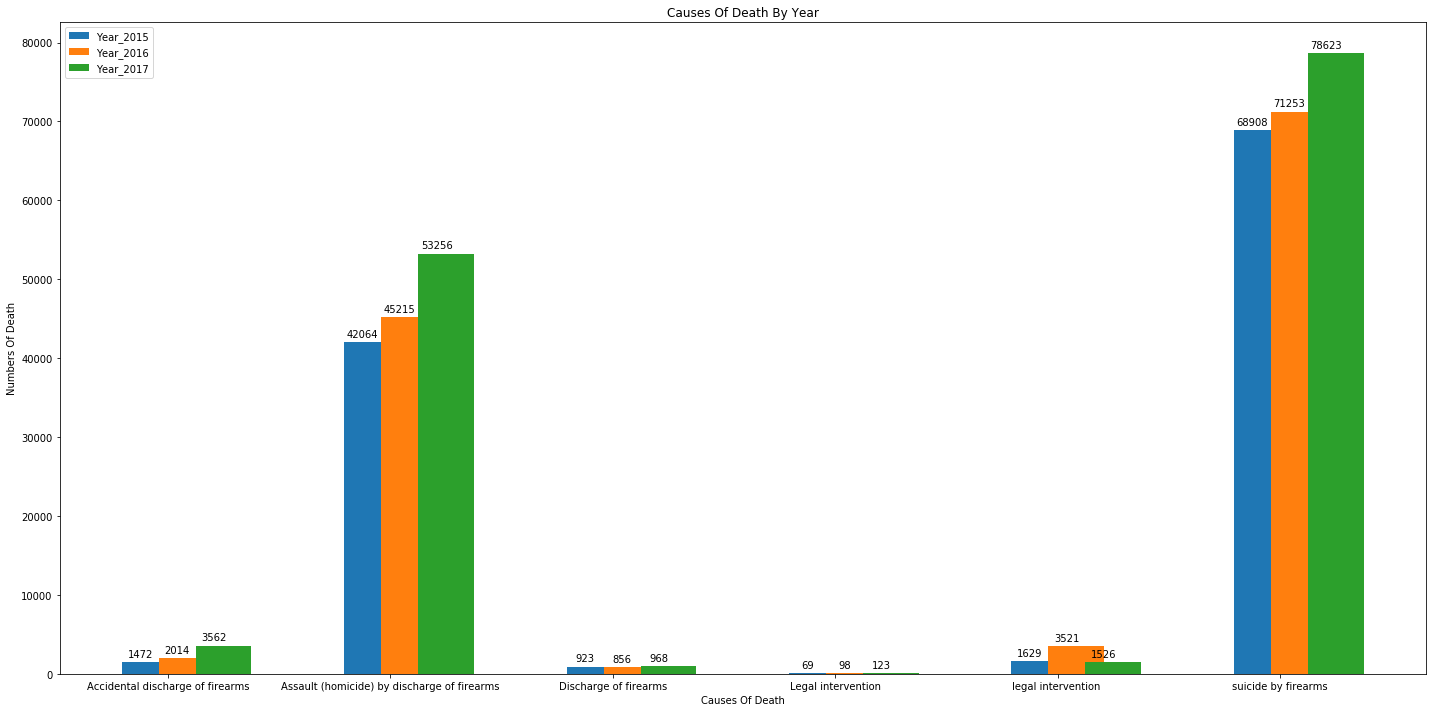

In [12]:
x= np.arange(len(labels))
width = 0.25

fig, ax= plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/3, year_2015, width, label='Year_2015')
rects2 = ax.bar(x + width/3, year_2016, width, label='Year_2016')
rects3 = ax.bar(x + (width), year_2017, width, label='Year_2017')

ax.set_ylabel('Numbers Of Death')
ax.set_title('Causes Of Death By Year')
ax.set_xlabel('Causes Of Death')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/ 3, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
plt.show()
fig.savefig('output.png')


In [13]:
x_axis= np.arange(len(guns_deaths_df['Age_Group'].unique()))
tick_locations = [values for values in x_axis]
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
y_axis = guns_deaths_df.groupby('Age_Group')
count_y_axis = y_axis['Age_Group'].count()
count_y_axis

Age_Group
1 - 4        259
15 - 24    22079
25 - 34    23998
35 - 44    17181
45 - 54    16469
5 - 14      1171
55 - 64    14930
65 - 74     9776
75 - 84     6305
<1            34
>85         2841
Unknown       22
Name: Age_Group, dtype: int64

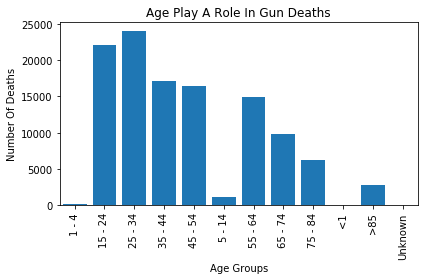

<Figure size 432x288 with 0 Axes>

In [18]:
plt.bar(x_axis,count_y_axis )
count_y_axis.plot(kind="bar")
plt.title("Age Play A Role In Gun Deaths")
plt.xlabel("Age Groups")
plt.ylabel("Number Of Deaths")
plt.tight_layout()

plt.show()
plt.savefig('abc.png')